In [35]:
from src.Math import InterpolationTable, _Pn
from pandas import DataFrame
from src.Table import Table
from matplotlib import pyplot as plt
import numpy as np

DATA_FILE: str = "data/data.txt"
table: Table = Table(DATA_FILE)
df: DataFrame = DataFrame(table.data)

In [27]:

meth: _Pn = InterpolationTable.newtonInterpolation(df, 4, 2.5)
print(InterpolationTable.newtonInterpolation(df, 4, 2.5))


   arg  f(arg)  f(x_0 x_1)  f(x_0 x_1 x_2)  f(x_0 x_1 x_2 x_3)  \
0  2.0   0.243       0.025          1.8875               0.125   
1  2.2   0.248       0.780          1.9625              -0.375   
2  2.4   0.404       1.565          1.7375                 NaN   
3  2.6   0.717       2.260             NaN                 NaN   
4  2.8   1.169         NaN             NaN                 NaN   

   f(x_0 x_1 x_2 x_3 x_4)  
0                  -0.625  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  


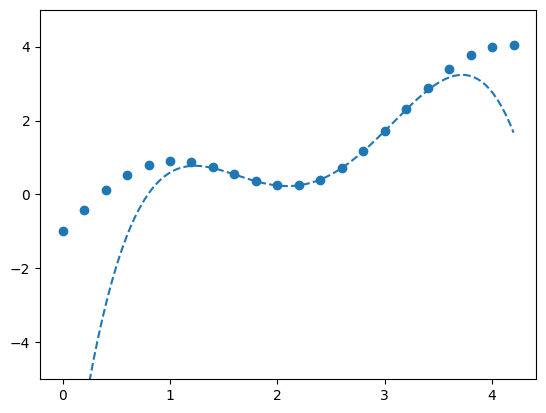

In [28]:
x = np.linspace(df["x"].min(), df["x"].max(), 500)
y = list(map(meth, x))

plt.ylim(-5, 5)
plt.scatter(df["x"], df["y"])
plt.plot(x, y, linestyle='--')
plt.show()

In [29]:
table: Table = Table(DATA_FILE)
data: DataFrame = DataFrame(table.data, dtype="float64")
data["x'"] = 1 / data["y'"]
data["x''"] = - data["y''"] / (data["y'"] ** 2)

reverseData: DataFrame = data[["y", "x", "x'", "x''"]][data["x"] < 1]

In [30]:
print(reverseData)

       y    x        x'       x''
0 -1.000  0.0  0.333333 -0.000000
1 -0.411  0.2  0.351865  0.192894
2  0.117  0.4  0.417885  0.501009
3  0.532  0.6  0.579710  1.252846
4  0.800  0.8  1.061571  4.505479


In [31]:
meth: _Pn = InterpolationTable.newtonInterpolation(reverseData, 4, 0)

In [32]:
print(meth)
print(meth.asPolynomialString())


     arg  f(arg)  f(x_0 x_1)  f(x_0 x_1 x_2)  f(x_0 x_1 x_2 x_3)  \
0 -1.000     0.0    0.339559        0.035120            0.048469   
1 -0.411     0.2    0.378788        0.109374            0.229277   
2  0.117     0.4    0.481928        0.387029                 NaN   
3  0.532     0.6    0.746269             NaN                 NaN   
4  0.800     0.8         NaN             NaN                 NaN   

   f(x_0 x_1 x_2 x_3 x_4)  
0                0.100449  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
1 * (0.0) + (x - -1.0) * (0.33955857385398985) + (x - -1.0)(x - -0.411) * (0.03512023718342787) + (x - -1.0)(x - -0.411)(x - 0.117) * (0.04846861745576313) + (x - -1.0)(x - -0.411)(x - 0.117)(x - 0.532) * (0.10044937538464267)


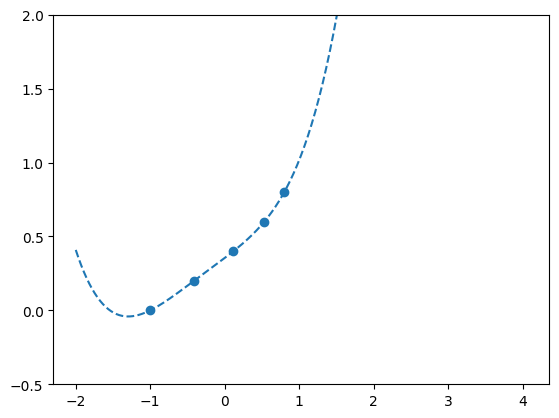

In [33]:
x = np.linspace(df["y"].min()-1, df["y"].max(), 500)
y = list(map(meth, x))

plt.ylim(-0.5, 2)
plt.scatter(reverseData["y"], reverseData["x"])
plt.plot(x, y, linestyle='--')
plt.show()

In [34]:
meth(0)


np.float64(0.35423200537749594)